# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

**Import numpy and pandas**

In [4]:
import pandas as pd
import numpy as np

**Import visualization libraries and set %matplotlib inline.**

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

**Read in the csv file as a dataframe called df**

In [13]:
df = pd.read_csv("911.csv")

**Check the info() of the df**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


**Check the head of df**

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [21]:
df["zip"].value_counts().head(5) # top 5 zipcodes for 911 calls

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [23]:
df['twp'].value_counts().head(5) #top 5 townships (twp) for 911 calls

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [25]:
df['title'].nunique() # unique title codes

110

## Creating new features

**Create a new column "Reason" from the "title" column by extracting the department using .apply() with a lambda function splitting each title at ':' and taking the first part.**

In [32]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [34]:
df['Reason'].value_counts() #the most common Reason for a 911 call based off of this new column

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

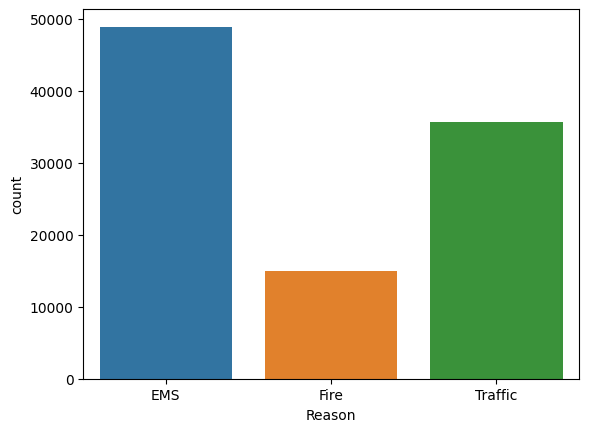

In [41]:
sns.countplot(x='Reason',data=df, hue='Reason') #countplot of 911 calls by Reason.
plt.show()

**the data type of the objects in the timeStamp column**

In [70]:
type(df['timeStamp'].iloc[0]) 

pandas._libs.tslibs.timestamps.Timestamp

**convert the column from strings to DateTime objects**

In [72]:
df['timeStamp']=pd.to_datetime(df['timeStamp']) 

**create 3 new columns called Hour, Month, and Day of Week.**

In [74]:
df['Hour']=df['timeStamp'].apply(lambda timeStamp: timeStamp.hour)
df['Month']=df['timeStamp'].apply(lambda timeStamp: timeStamp.month)
df['Day of Week']=df['timeStamp'].apply(lambda timeStamp: timeStamp.dayofweek)

**Useing the .map() with this dictionary to map the actual string names to the day of the week:**

In [76]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [78]:
df['Day of Week']=df['Day of Week'].map(dmap)

**countplot of the Day of Week column with the hue based off of the Reason column.**

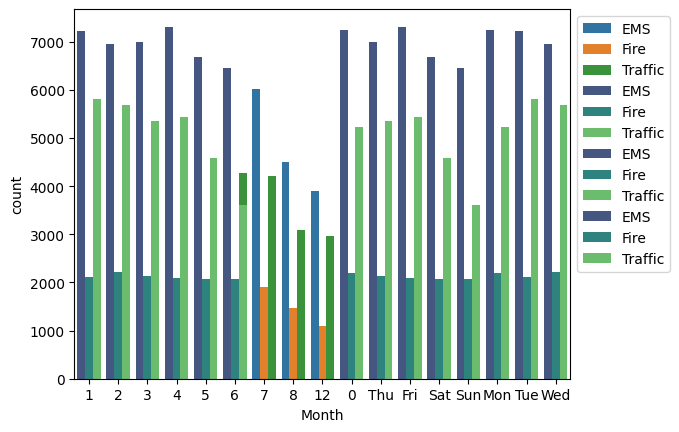

In [82]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

**same for Month:**

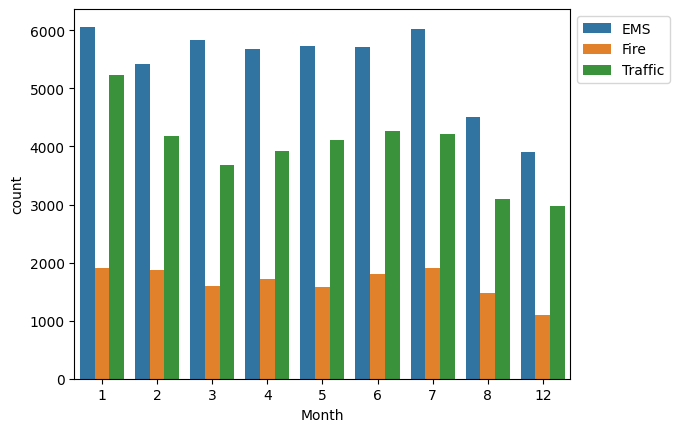

In [86]:
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1,1),loc=2)
plt.show()

**Now creating a gropuby object called byMonth**

In [60]:
byMonth=df.groupby('Month').count()
byMonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**creating a simple plot off of the dataframe indicating the count of calls per month.**

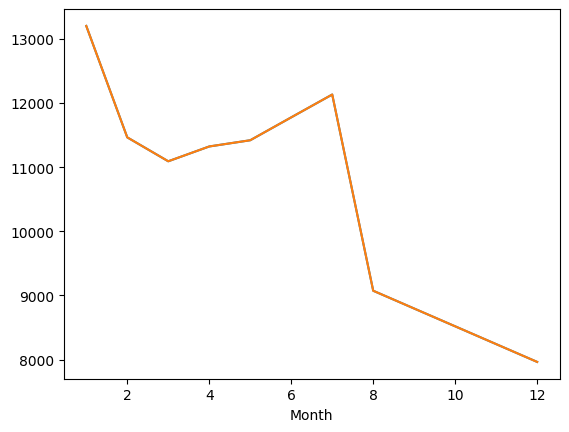

In [91]:
byMonth['twp'].plot()
plt.show()

**lmplot() to create a linear fit on the number of calls per month.**

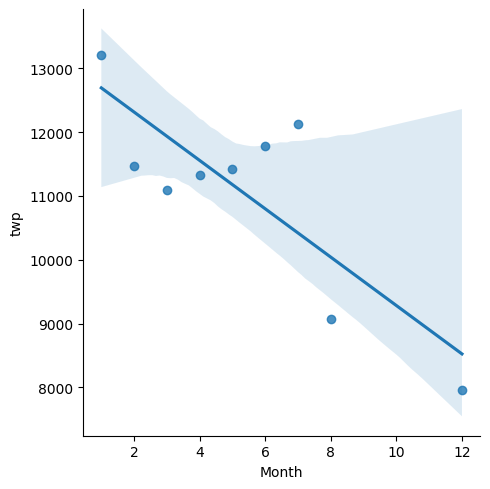

In [98]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())
plt.show()

**Creating a new column called 'Date' that contains the date from the timeStamp column.** 

In [101]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

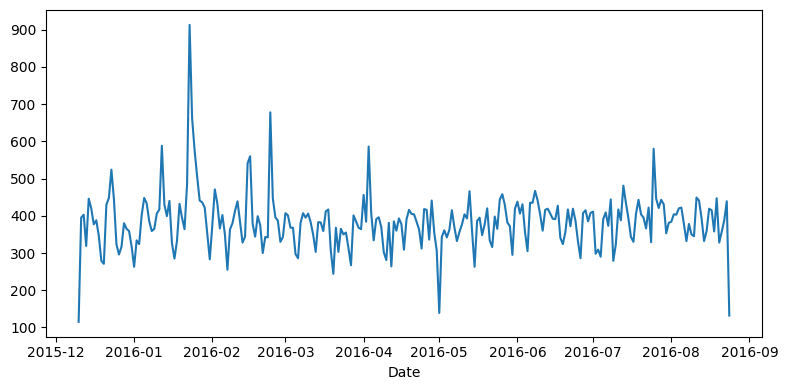

In [131]:
plt.figure(figsize=(8,4))
a=df.groupby('Date').count()['twp']
a.plot()
plt.tight_layout()
plt.show()

**Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

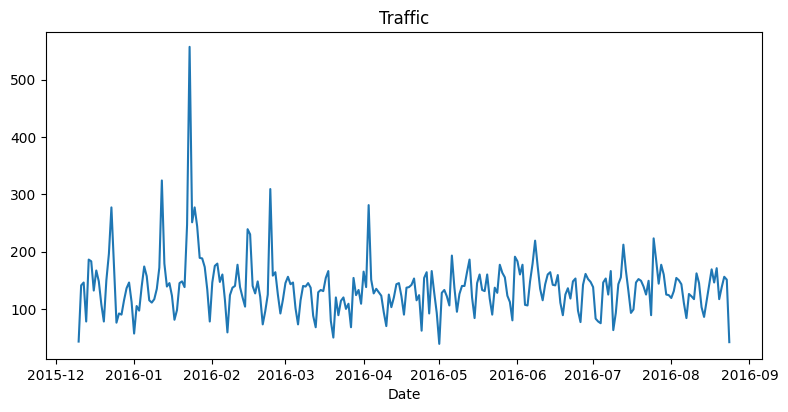

In [129]:
plt.figure(figsize=(8,4))
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Traffic')
plt.show()

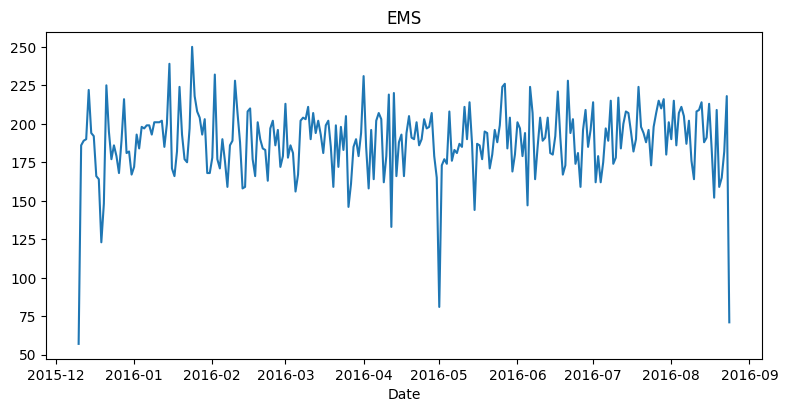

In [127]:
plt.figure(figsize=(8,4))
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')
plt.show()

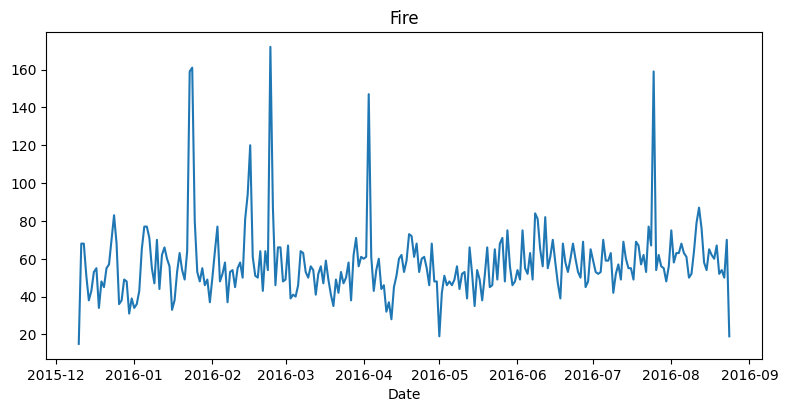

In [133]:
plt.figure(figsize=(8,4))
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.title('Fire')
plt.show()

**restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [140]:
# dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()

dayHour=df.groupby(by=['Day of Week','Hour'])
a=dayHour.count()['Reason']
b=a.unstack()
b.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**create a HeatMap using this new DataFrame.**

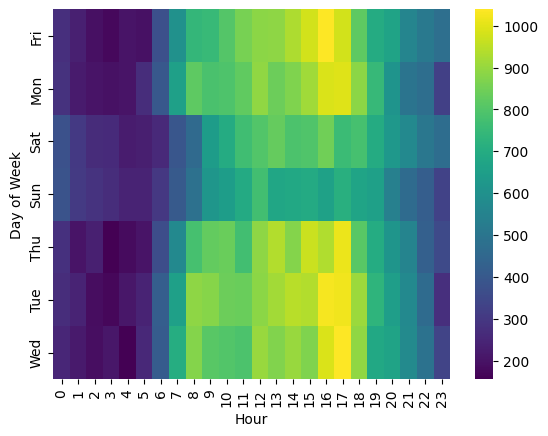

In [142]:
sns.heatmap(b,cmap='viridis')
plt.show()

**create a clustermap using this DataFrame.**

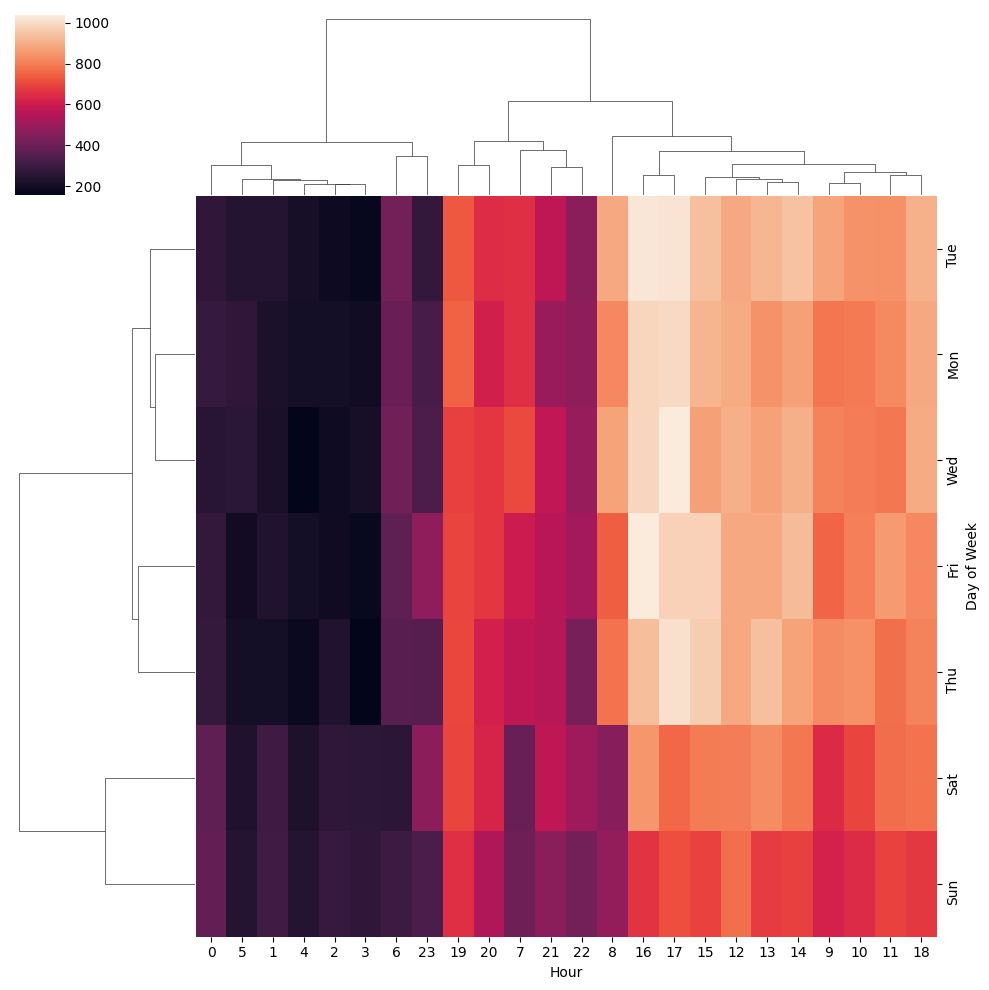

In [147]:
sns.clustermap(b)
plt.show()

**repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [156]:
day=df.groupby(by=['Month','Day of Week']).count()['Reason'].unstack()
day.head()

Day of Week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
Month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538


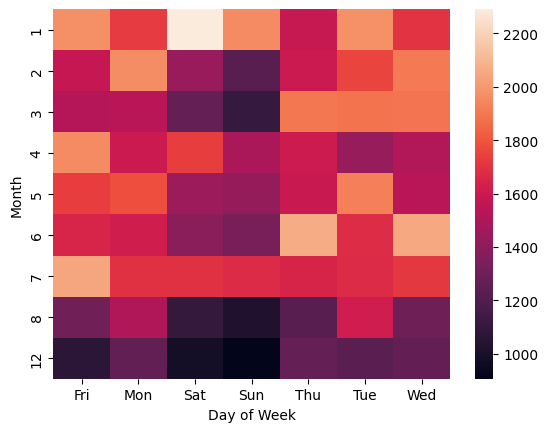

In [158]:
sns.heatmap(day)
plt.show()

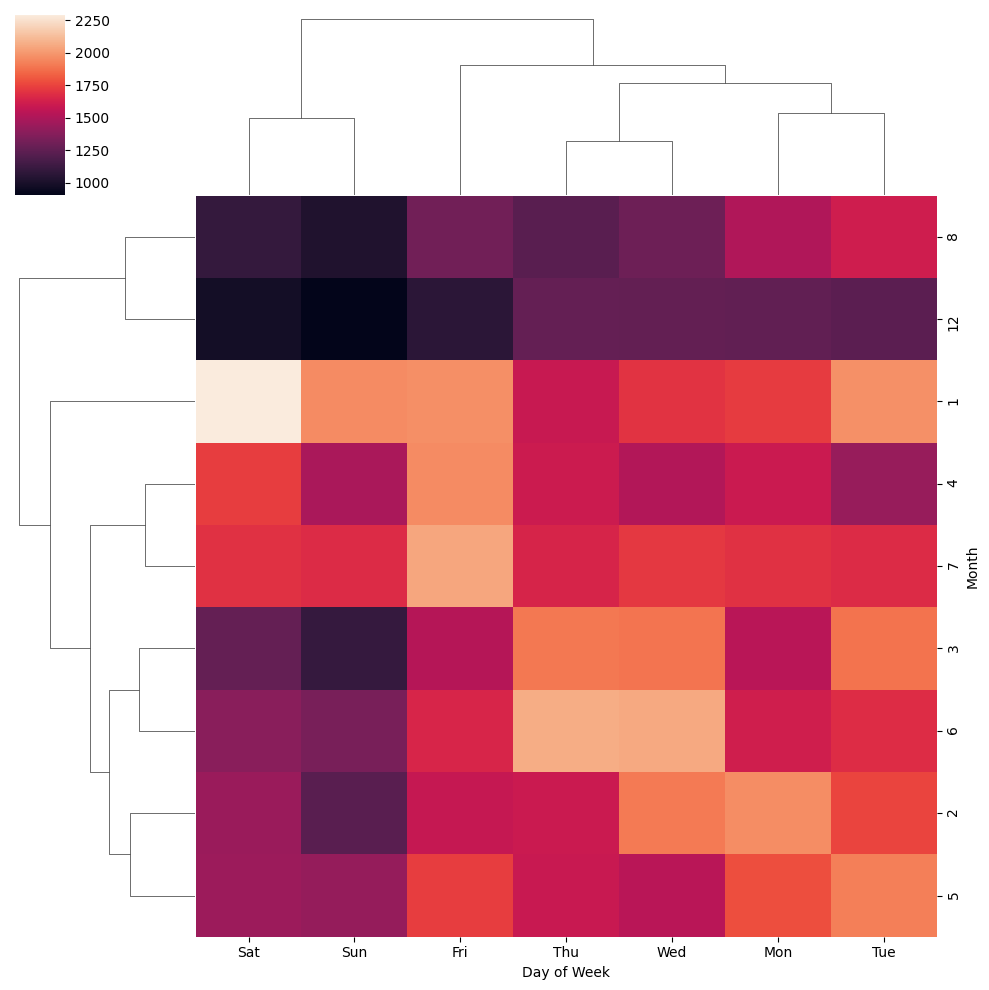

In [164]:
sns.clustermap(day)
plt.show()